# FIAP BUSINESS PROCESS DIGITAL AUTOMATION & EMERGING TECHNOLOGIES

![](https://github.com/michelpf/fiap-bpm-python-dados-ia-estimativa-precos-automoveis/blob/master/projeto-final/imagens/bpm.jpg)

## Python para IA & Dados
## Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

> 👋 O projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Daniella Rodrigues                  | RM 350571      | `2BPMR` |
| Fernanda Rodrigues                | RM 349575      | `2BPMR` |
| Renata Alencar                  | RM 349768      | `2BPMR` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento.

> 👉 Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:

1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [109]:
%cd fiap-bpm-python-dados-ia-estimativa-precos-automoveis/projeto-final/

[Errno 2] No such file or directory: 'fiap-bpm-python-dados-ia-estimativa-precos-automoveis/projeto-final/'
/content


## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação**

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

**O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.**

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [122]:
#IMPLEMENTAR
automobile = pd.read_csv("/content/automobile-mod.csv", sep=";")
automobile.head(10)


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

In [123]:
#IMPLEMENTAR
auto_correlacao = automobile[["city_mpg", "highway_mpg", "length", "width", "height", "horsepower", "price"]].corr()
auto_correlacao


,city_mpg,highway_mpg,length,width,height,horsepower,price
city_mpg,1.000000,0.875933,-0.633185,-0.620316,-0.069029,-0.763573,-0.657661
highway_mpg,0.875933,1.000000,-0.709308,-0.697742,-0.117146,-0.776634,-0.712812
length,-0.633185,-0.709308,1.000000,0.857170,0.492063,0.577923,0.690628
width,-0.620316,-0.697742,0.857170,1.000000,0.306002,0.613488,0.751265
height,-0.069029,-0.117146,0.492063,0.306002,1.000000,-0.085544,0.135486
horsepower,-0.763573,-0.776634,0.577923,0.613488,-0.085544,1.000000,0.810795
price,-0.657661,-0.712812,0.690628,0.751265,0.135486,0.810795,1.000000


In [124]:
auto_pricey=automobile.sort_values(["price"], ascending=False).head(10)[["make", "price"]]
auto_biggest=automobile.sort_values(["length", "width", "height"], ascending=False).head(10)[["length", "width", "height"]]
auto_powerful=automobile.sort_values(["horsepower"], ascending=False).head(10)[["horsepower"]]
auto_economic=automobile.sort_values(["city_mpg", "highway_mpg"]).head(10)[["city_mpg", "highway_mpg"]]
print("10 com maiores preços")
print(auto_pricey)
print("\n\n10 com maiores dimensões")
print(auto_biggest)
print("\n\n10 com maiores potências")
print(auto_powerful)
print("\n\n10 mais econômicos")
print(auto_economic)

10 com maiores preços
              make  price
71   mercedes-benz  45400
15             bmw  41315
70   mercedes-benz  40960
125        porsche  37028
16             bmw  36880
46          jaguar  36000
45          jaguar  35550
69   mercedes-benz  35056
68   mercedes-benz  34184
124        porsche  34028


10 com maiores dimensões
     length  width  height
70    208.1   71.7    56.7
68    202.6   71.7    56.5
67    202.6   71.7    56.3
44    199.6   69.6    52.8
45    199.6   69.6    52.8
71    199.2   72.0    55.4
106   198.9   68.4    58.7
107   198.9   68.4    58.7
111   198.9   68.4    58.7
110   198.9   68.4    56.7


10 com maiores potências
     horsepower
46          262
125         207
124         207
123         207
102         200
70          184
71          184
16          182
15          182
14          182


10 mais econômicos
     city_mpg  highway_mpg
66        0.0         25.0
181       0.0         34.0
46       13.0         17.0
70       14.0         16.0
71       

In [125]:
auto_pricey_biggest = pd.merge(auto_pricey, auto_biggest, left_index=True, right_index=True)
auto_pricey_powerful = pd.merge(auto_pricey, auto_powerful, left_index=True, right_index=True)
auto_pricey_economic = pd.merge(auto_pricey, auto_economic, left_index=True, right_index=True)
print("Preço X Tamanho")
print(auto_pricey_biggest)
print("")
print("Preço X Força")
print(auto_pricey_powerful)
print("")
print("Preço X Consumo")
print(auto_pricey_economic)

Preço X Tamanho
             make  price  length  width  height
71  mercedes-benz  45400   199.2   72.0    55.4
70  mercedes-benz  40960   208.1   71.7    56.7
45         jaguar  35550   199.6   69.6    52.8
68  mercedes-benz  34184   202.6   71.7    56.5

Preço X Força
              make  price  horsepower
71   mercedes-benz  45400         184
15             bmw  41315         182
70   mercedes-benz  40960         184
125        porsche  37028         207
16             bmw  36880         182
46          jaguar  36000         262
124        porsche  34028         207

Preço X Consumo
             make  price  city_mpg  highway_mpg
71  mercedes-benz  45400      14.0         16.0
70  mercedes-benz  40960      14.0         16.0
16            bmw  36880      15.0         20.0
46         jaguar  36000      13.0         17.0
45         jaguar  35550      15.0         19.0
69  mercedes-benz  35056      16.0         18.0
68  mercedes-benz  34184      16.0         18.0


**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

Considerando os 3 cenários notamos que o veículo da marca Mercedes-Benz.apresenta o preço mais alto entre os carros listados. Intrigantemente, este mesmo veículo é também o maior em termos de dimensões, com uma combinação de comprimento, largura e altura notavelmente superior aos demais. Essa observação vai de encontro à correlação negativa entre preço e tamanho, sugerindo que carros maiores tendem a ter preços mais elevados.

Ao analisar os carros mais potentes, identificamos que o modelo da Jaguar, o terceiro mais caro, apresenta a maior potência entre os veículos listados. Esse exemplo corrobora a correlação positiva entre preço e potência, indicando que carros mais potentes geralmente estão associados a preços mais elevados.

Os carros da Mercedes-Benz, classificados como os mais caros, também são os menos econômicos em termos de consumo de combustível, exibindo baixas médias de milhas por galão tanto na cidade quanto na estrada. Esse padrão respalda a correlação negativa entre preço e consumo, sugerindo que veículos mais econômicos tendem a ter preços mais acessíveis.

Esses exemplos reforçam as correlações iniciais, oferecendo evidências práticas sobre como as distintas características dos carros exercem impacto sobre seus preços.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

In [126]:
#Converte a informação sobre número de portas para um valor numérico
mapa_str_num = {"one":int(1),"two":int(2),"three":int(3),"four":int(4),"five":int(5),"six":int(6),
                 "seven":int(7),"eight":int(8),"nine":int(9),"ten":int(10),"eleven":int(11),"twelve":int(12)}


automobile["number_of_doors"] = automobile["number_of_doors"].map(mapa_str_num)
automobile["number_of_cylinders"] = automobile["number_of_cylinders"].map(mapa_str_num)

automobile[["number_of_cylinders","number_of_doors"]].head(10)

,number_of_cylinders,number_of_doors
0,4,2
1,4,2
2,6,2
3,4,4
4,5,4
5,5,2
6,5,4
7,5,4
8,5,4
9,4,2


In [127]:
def normalize(df,colunas):
    df_aux = df.copy()
    for col in colunas:
        df_aux[col] = (df_aux[col] - df_aux[col].mean()) / (df_aux[col].max() - df_aux[col].min())
    return (df_aux)

cols_numericas = ["number_of_doors","wheel_base","length","width","height",
                      "curb_weight","number_of_cylinders","engine_size",
                      "bore","stroke","compression_ratio","horsepower","peak_rpm",
                      "city_mpg","highway_mpg","price"]

#Normaliza as informações númericas do dataframe de automóveis
automobile_norm = normalize(automobile,cols_numericas)

automobile_norm[cols_numericas].head(10)

,number_of_doors,wheel_base,length,width,height,curb_weight,number_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,-0.567164,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,-0.036318,0.011790,0.100213,-0.277020,-0.072767,0.036151,-0.009517,-0.080102,-0.065648,0.007146
1,-0.567164,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,-0.036318,0.011790,0.100213,-0.277020,-0.072767,0.036151,-0.009517,-0.080102,-0.065648,0.081745
2,-0.567164,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,0.163682,0.094809,-0.464072,0.099171,-0.072767,0.237086,-0.009517,-0.120918,-0.084167,0.081745
3,0.432836,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.036318,-0.067455,-0.099787,0.065837,-0.010267,-0.005905,0.066240,-0.018878,-0.010093,0.018442
4,0.432836,0.017580,0.035806,0.043671,0.044444,0.104086,0.063682,0.034432,-0.099787,0.065837,-0.135267,0.054843,0.066240,-0.141327,-0.158241,0.105329
5,-0.567164,0.029242,0.046254,0.035124,-0.055556,-0.018878,0.063682,0.034432,-0.099787,0.065837,-0.104017,0.031478,0.066240,-0.120918,-0.102685,0.050714
6,0.432836,0.204169,0.276105,0.471021,0.161111,0.111844,0.063682,0.034432,-0.099787,0.065837,-0.104017,0.031478,0.066240,-0.120918,-0.102685,0.111784
7,0.432836,0.204169,0.276105,0.471021,0.161111,0.154513,0.063682,0.034432,-0.099787,0.065837,-0.104017,0.031478,0.066240,-0.120918,-0.102685,0.141822
8,0.432836,0.204169,0.276105,0.471021,0.177778,0.205715,0.063682,0.015564,-0.142644,0.065837,-0.116517,0.171665,0.066240,-0.161735,-0.195278,0.264830
9,-0.567164,0.070058,0.038791,-0.093082,0.044444,-0.062322,-0.036318,-0.071229,0.121642,-0.219877,-0.085267,-0.010578,0.111695,-0.039286,-0.028611,0.080008


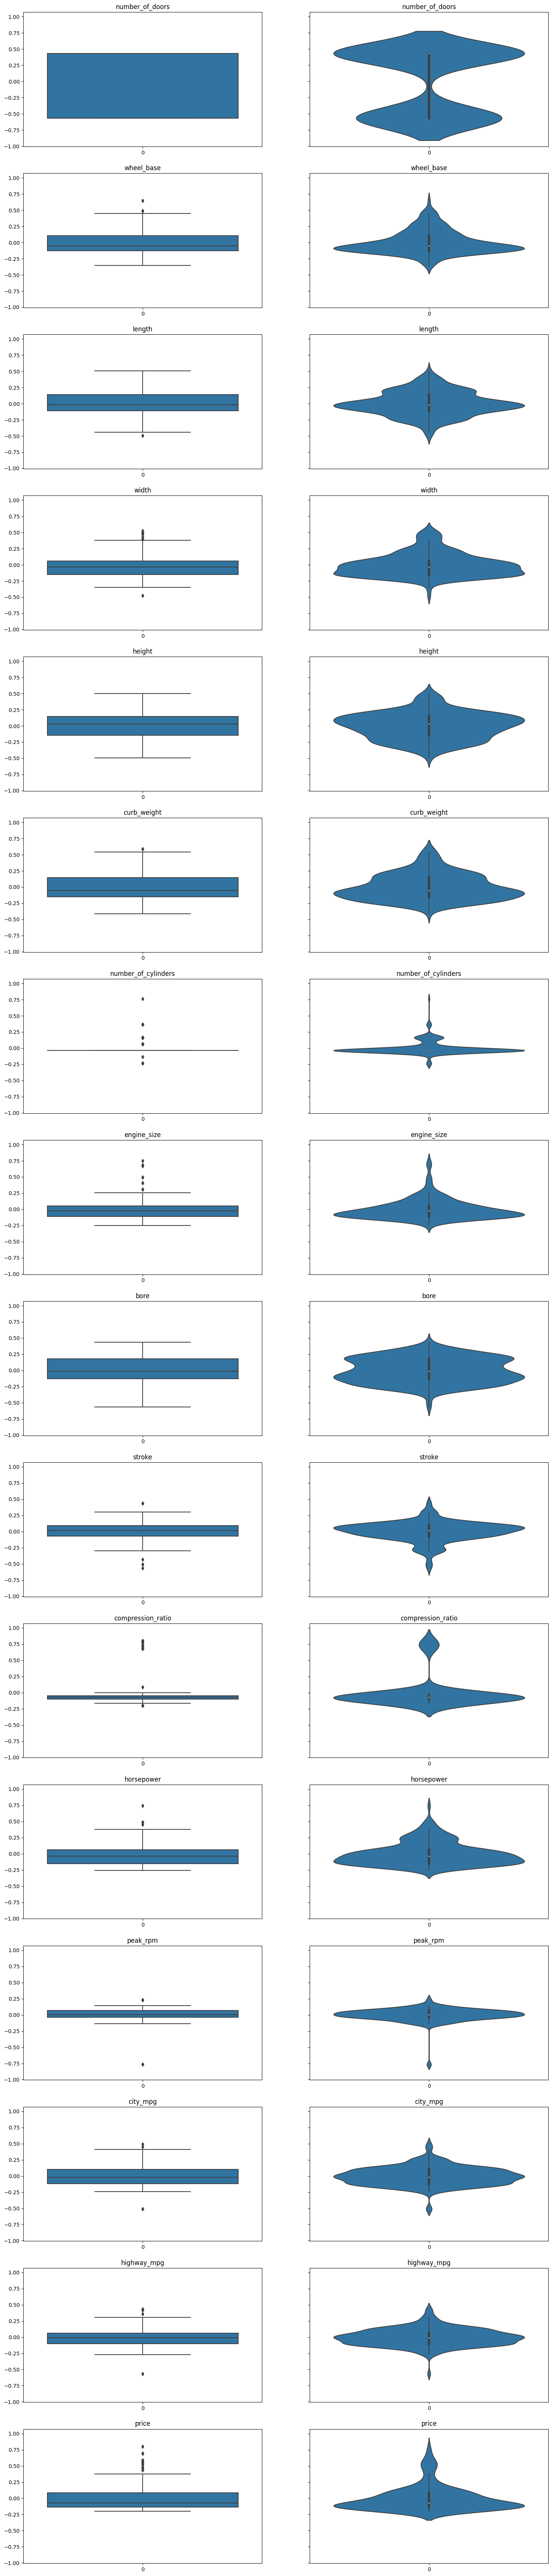

In [128]:
import math

n_linhas = len(cols_numericas)
fig,ax = plt.subplots(nrows=n_linhas,ncols=2, sharey=True)


fig.set_size_inches(18, 88)
for i in range(n_linhas):
    sns.boxplot(ax=ax[i,0], data=[automobile_norm[cols_numericas[i]]]).set_title(cols_numericas[i])
    sns.violinplot(ax=ax[i,1], data=[automobile_norm[cols_numericas[i]]]).set_title(cols_numericas[i])

In [129]:
estat = automobile_norm.describe()
for col in cols_numericas:
    #Intervalo inter-quartil
    iq = (estat[col]["75%"] - estat[col]["25%"])
    #Limite superior para outlier é 1,5 vezes o intervalo interquartílico acima do 75% percentil
    lim_sup = estat[col]["75%"] + 1.5 * iq
    #Limite inferior para outlier é 1,5 vezes o intervalo interquartílico abaixo do 25% percentil
    lim_inf = estat[col]["25%"] - 1.5 * iq
    #Seleciona os carros que seguem a regra calculada acima
    vet_out = automobile_norm[(automobile_norm[col] > lim_sup) | (automobile_norm[col] < lim_inf)][[col]]
    #Se algum elemento foi selecionado, imprima
    if (len(vet_out) > 0 ):
       print("Candidatos a outliers para " + col)
       print(vet_out)
       print("\n\n")

Candidatos a outliers para wheel_base
    wheel_base
67    0.489883
68    0.489883
70    0.644402



Candidatos a outliers para length
      length
17 -0.494045



Candidatos a outliers para width
       width
6   0.471021
7   0.471021
8   0.471021
16  0.428286
17 -0.477697
46  0.402645
67  0.496662
68  0.496662
69  0.394098
70  0.496662
71  0.522303



Candidatos a outliers para curb_weight
    curb_weight
44     0.585855
45     0.585855



Candidatos a outliers para number_of_cylinders
     number_of_cylinders
2               0.163682
4               0.063682
5               0.063682
6               0.063682
7               0.063682
8               0.063682
11              0.163682
12              0.163682
13              0.163682
14              0.163682
15              0.163682
16              0.163682
17             -0.136318
44              0.163682
45              0.163682
46              0.763682
52             -0.236318
53             -0.236318
54             -0.236318
55     

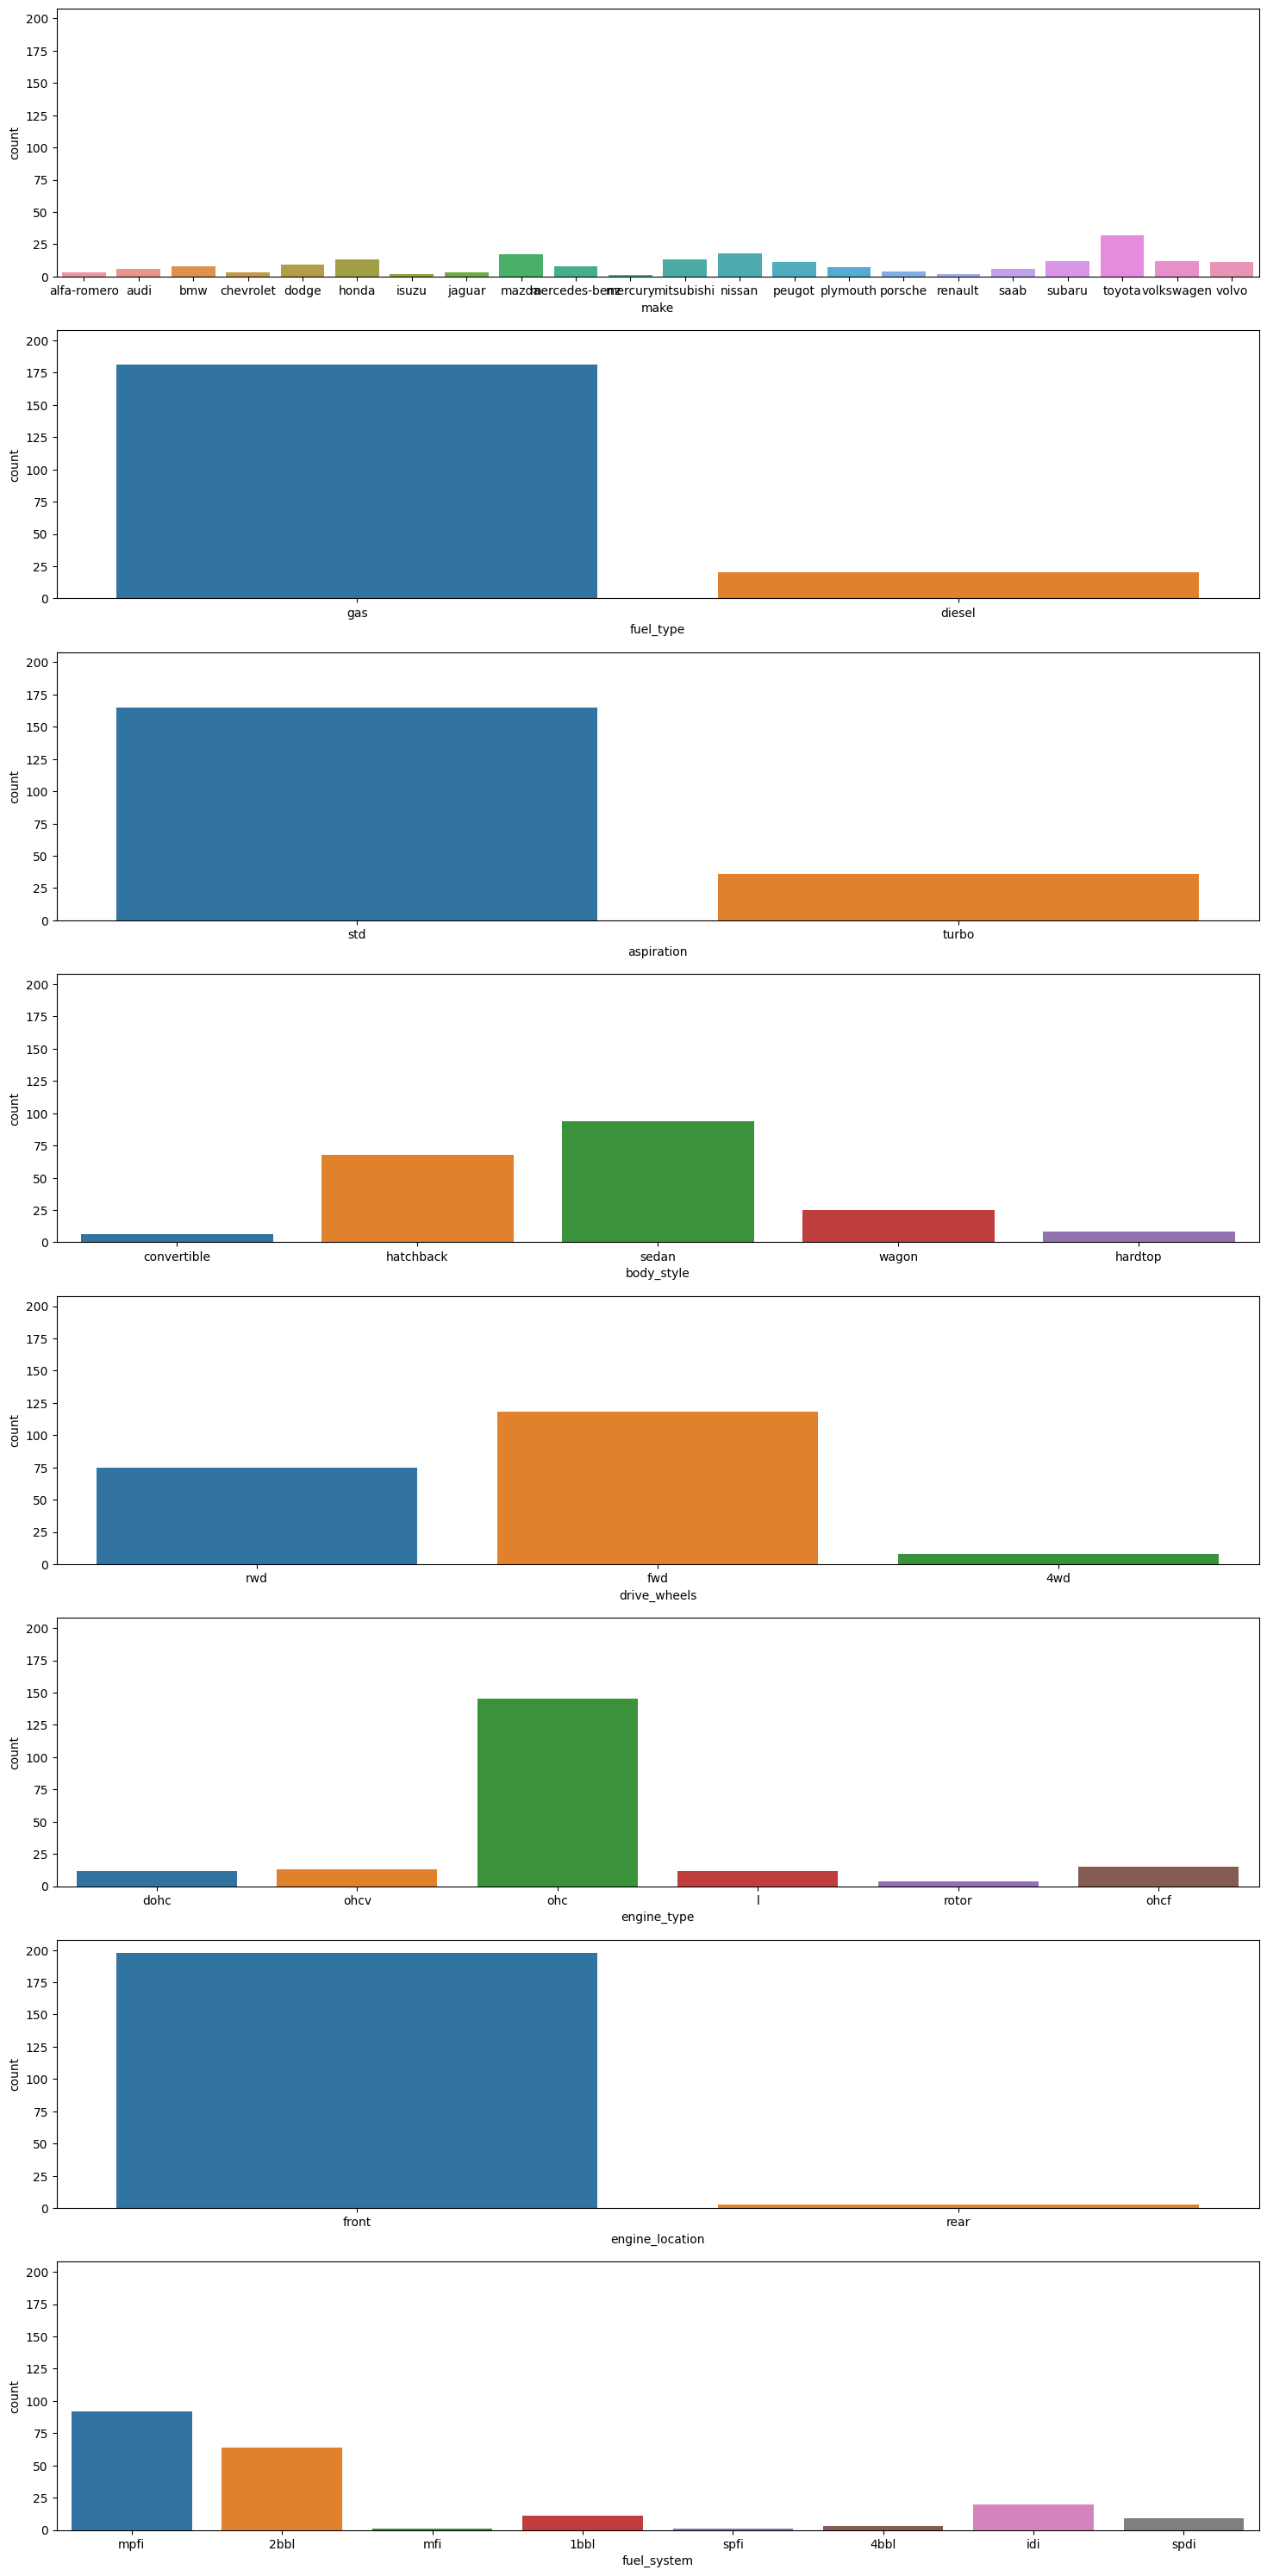

In [130]:
#Análise dos atributos categóricos nominais
cols_alfa = ["make","fuel_type","aspiration","body_style","drive_wheels","engine_type","engine_location","fuel_system"]
n_linhas = len(cols_alfa)
fig,ax = plt.subplots(nrows=n_linhas, sharey=True)
fig.set_size_inches(18, 38)
#Exibe o histograma de quantidades de elementos por categoria para verificar se há alguma informação discrepante
for i in range(n_linhas):
    sns.countplot(ax=ax[i],x=cols_alfa[i],data=automobile_norm)


Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [131]:
#Verifica se há valores nulos
automobile.isnull().sum()

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               1
highway_mpg            1
price                  0
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [132]:
#IMPLEMENTAÇÃO
# Analisando os valores com indices nulos
automobile[pd.isnull(automobile).any(axis=1)]


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
36,honda,gas,std,2,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
136,subaru,gas,std,2,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,4,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


             highway_mpg  city_mpg
highway_mpg     1.000000  0.875933
city_mpg        0.875933  1.000000


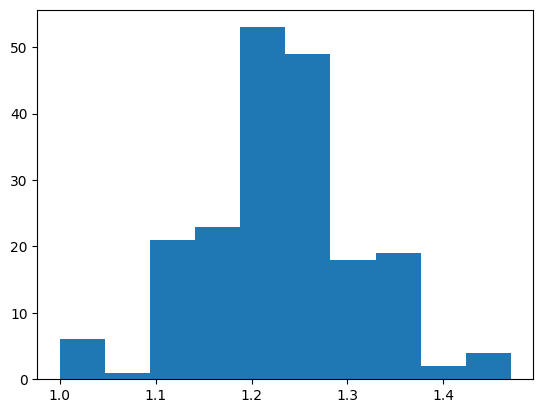

In [133]:
#Verifica-se a correlação entre o consumo na estrada e o consumo na cidade
#e percebe-se que há uma alta correlação entre os atributos
print(automobile[["highway_mpg", "city_mpg"]].corr())


#Calcula a relação entre o consumo da estrada e o consumo da cidade para quando há os valores ou quando
#os valores não são zerados
automobile["relacao_estrada_cidade"] = np.where((automobile["city_mpg"].isnull())  | (automobile["city_mpg"]==0) |
                                                (automobile["highway_mpg"].isnull()) | (automobile["highway_mpg"]==0),
                                                 np.nan,
                                                automobile["highway_mpg"] / automobile["city_mpg"])


#Percebe-se pelo gráfico que a distribuição entre a relacao_estrada_cidade é muito concentrada ao redor da média,
#semelhante a uma distribuição normal
ax = plt.hist(automobile[automobile["relacao_estrada_cidade"].notnull()]["relacao_estrada_cidade"])

In [134]:
#Verifica-se agora que o peak_rpm não possui uma alta correlação com nenhum outro atributo sobre automóveis
#conforme percebe-se abaixo
automobile.corr()["peak_rpm"]

<ipython-input-134-7a1e04a80344>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  automobile.corr()["peak_rpm"]


number_of_doors          -0.163910
wheel_base               -0.202727
length                   -0.056354
width                    -0.092631
height                   -0.275686
curb_weight              -0.098857
number_of_cylinders      -0.077775
engine_size              -0.104959
bore                     -0.046081
stroke                   -0.065078
compression_ratio        -0.284202
horsepower                0.132510
peak_rpm                  1.000000
city_mpg                 -0.127533
highway_mpg              -0.050670
price                    -0.006104
relacao_estrada_cidade    0.317387
Name: peak_rpm, dtype: float64

In [135]:
#calcula a média da relação entre o consumo da estrada / consumo da cidade
media_estrada_cidade = automobile["relacao_estrada_cidade"].mean(skipna=True)
media_estrada_cidade

1.2318479649443903

In [136]:
#Converte o consumo na cidade quando null em função do consumo da estrada
for i,row in automobile.loc[automobile["city_mpg"].isnull(),:].iterrows():
    automobile.loc[i,"city_mpg"] = automobile.loc[i,"highway_mpg"] / media_estrada_cidade


#Converte o consumo na estrada quando null em função do consumo da cidade
for i,row in automobile.loc[automobile["highway_mpg"].isnull(),:].iterrows():
    automobile.loc[i,"highway_mpg"] = automobile.loc[i,"city_mpg"] * media_estrada_cidade

In [137]:
#Tratamento para os carros com peak_rpm nulo

#Seleciona os carros com peak_rpm que não são nulos e nem tem valor de peak_rpm com valores iguais a zero
peak_rpm_tratado = automobile[(automobile["peak_rpm"].notnull()) & (automobile["peak_rpm"] > 0)]


#Obtem a média do peak_rpm
peak_rpm_medio = peak_rpm_tratado["peak_rpm"].mean()

for i,row in automobile.loc[automobile["peak_rpm"].isnull(),:].iterrows():
    automobile.loc[i,"peak_rpm"] = peak_rpm_medio


### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [138]:
#IMPLEMENTAÇÃO

# Verificando colunas que possuem zero
automobile.all() == 0

make                      False
fuel_type                 False
aspiration                False
number_of_doors           False
body_style                False
drive_wheels              False
engine_location           False
wheel_base                False
length                    False
width                     False
height                    False
curb_weight               False
engine_type               False
number_of_cylinders       False
engine_size               False
fuel_system               False
bore                      False
stroke                    False
compression_ratio         False
horsepower                False
peak_rpm                   True
city_mpg                   True
highway_mpg                True
price                     False
relacao_estrada_cidade    False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [139]:
#IMPLEMENTAÇÃO

# Calculando a média da coluna 'peak_rpm'
media_peak_rpm = automobile['peak_rpm'].mean()

# Calculando a média da coluna 'city_mpg'
media_city_mpg = automobile['city_mpg'].mean()

# Calculando a média da coluna 'highway_mpg'
media_highway_mpg = automobile['highway_mpg'].mean()

# Exibindo as médias calculadas
print("Média de peak_rpm:", media_peak_rpm)
print("Média de city_mpg:", media_city_mpg)
print("Média de highway_mpg:", media_highway_mpg)



Média de peak_rpm: 5063.325504457408
Média de city_mpg: 24.934273732272782
Média de highway_mpg: 30.57689273108623


In [140]:
# Substituindo os valores iguais a 0 em "peak_rpm" pela média
automobile["peak_rpm"].replace(0, automobile["peak_rpm"].mean(), inplace=True)

# Substituindo os valores iguais a 0 em "city_mpg" pela média
automobile["city_mpg"].replace(0, automobile["city_mpg"].mean(), inplace=True)

# Substituindo os valores iguais a 0 em "highway_mpg" pela média
automobile["highway_mpg"].replace(0, automobile["highway_mpg"].mean(), inplace=True)


### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [273]:
def identificacao_outlier(df,column_name):
    print(column_name)
    q1 = np.percentile(df[column_name], 25)
    q3=  np.percentile(df[column_name], 75)
    iqr = q3 - q1
    outlier_lower = q1 - (iqr * 1.5)
    outlier_upper = q3 + (iqr * 1.5)
    return (outlier_upper + outlier_lower)


comp  = identificacao_outlier(automobile,'compression_ratio')
horse = identificacao_outlier(automobile,'horsepower')
price   = identificacao_outlier(automobile,'price')

print(comp, horse, price)


compression_ratio
horsepower
price
18.0 186.0 24275.0


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Quais foram os atributos discretpantes e quais as hipótese de serem discrepantes? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** Sim. Pela metodologia sugerida foram localizados dados discrepantes.


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [261]:
def mapear_serie(serie):
    dict_gen = {}
    uniquedataframe = sorted(serie.unique())
    dict_gen = dict(zip(range(1,len(uniquedataframe)+1),uniquedataframe))
    return  dict(zip(dict_gen.values(), dict_gen.keys()))

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [157]:
# IMPLEMENTAÇÃO
dicnumber_of_doors= mapear_serie(automobile['number_of_doors'])
dicbody_style= mapear_serie(automobile['body_style'])
dicdrive_wheels= mapear_serie(automobile['drive_wheels'])
dicmake= mapear_serie(automobile['make'])
dicaspiration= mapear_serie(automobile['aspiration'])
dicfuel_type= mapear_serie(automobile['fuel_type'])
dicengine_location= mapear_serie(automobile['engine_location'])
dicfuel_system=mapear_serie(automobile['fuel_system'])

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [158]:
#IMPLEMENTAÇÃO
automobile['number_of_doors'].replace(dicnumber_of_doors, inplace=True)
automobile['body_style'].replace(dicbody_style, inplace=True)
automobile['drive_wheels'].replace(dicdrive_wheels, inplace=True)
automobile['make'].replace(dicmake, inplace=True)
automobile['aspiration'].replace(dicaspiration, inplace=True)
automobile['fuel_type'].replace(dicfuel_type, inplace=True)
automobile['engine_location'].replace(dicengine_location, inplace=True)
automobile['fuel_system'].replace(dicfuel_system, inplace=True)

automobile.head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,relacao_estrada_cidade
0,1,2,1,1,1,3,1,88.6,168.8,64.1,...,6,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495,1.285714
1,1,2,1,1,1,3,1,88.6,168.8,64.1,...,6,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500,1.285714
2,1,2,1,1,3,3,1,94.5,171.2,65.5,...,6,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500,1.368421
3,2,2,1,2,4,2,1,99.8,176.6,66.2,...,6,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950,1.250000
4,2,2,1,2,4,1,1,99.4,176.6,66.4,...,6,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450,1.222222
5,2,2,1,1,4,2,1,99.8,177.3,66.3,...,6,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250,1.315789
6,2,2,1,2,4,2,1,105.8,192.7,71.4,...,6,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710,1.315789
7,2,2,1,2,5,2,1,105.8,192.7,71.4,...,6,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920,1.315789
8,2,2,2,2,4,2,1,105.8,192.7,71.4,...,6,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875,1.176471
9,3,2,1,1,4,3,1,101.2,176.8,64.8,...,6,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430,1.260870


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

**Regressão Linear:**

Analisa a correlação de um dado x (variável dependente) em função de uma variável y (variável independente), é utilizada para predizer valores de x conforme a variação da variável y. Geralmente é representada por uma reta sobre um diagrama de dispersão. Caso esta reta seja horizontal (paralela ao eixo x, diz-se que não existe correlação entre as variáveis. Caso a reta seja inclinada para cima ( o lado mais à direita do gráfico esteja numa posição superior ao lado esquerdo - quanto mais à direito maior o valor de y ) diz-se que existe uma relação linear positiva entre x e y e caso ela se incline pra baixo, diz-se que existe uma relação linear negativa entre as variáveis. Caso sejam utilizadas mais de uma variável y para determinar o valor de x, é chamada de regressão linear múltipla. Exemplo de uso: Predizer o valor de imóveis em função da sua localização, tamanho, idade, qtde de suítes e outros atributos. Predizer o tempo de percurso de um trajeto em função da distância, da localização de partida e chegada, do horário que irá realizar o percurso.

**Arvore de Decisão**

Arvore de decisão são fluxos a ser percorridos que variam de acordo com cada decisão (ou resposta) a cada nó da árvore até chegar à um nó final onde se tem a decisão a ser tomada ou a uma predição. No caso da conclusão ser uma predição, os nós representam dados (características) do que está sendo analisado. Exemplo de uso: Chatbot de atendimento

**Regressão Ridge**

É um método de regularização do modelo que tem o objetivo de suavizar na base de treinamento algumas variáveis que são altamente correlacionadas entre si, deixando apenas uma dela como relevante. É utilizado um mecanismo de penalização que coloca um viés e vai reduzindo os valores Beta até próximos de zero, tornando-se irrelevantes para o modelo. Exemplo de uso: onde existe um grande número de variáveis; onde existe uma relação baixa de observações numéricas para número de variáveis; onde existe alta Multicolinearidade (variáveis independentes possuem relações lineares exatas ou aproximadamente exatas).


Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e por qual motivo. Informe também qual seria o atributo preditor?

In [203]:
# Para a predição do preço dos automóveis, vamos utilizar os atributos com maiores correlação com relação ao atributo procurado
print(automobile.corr(numeric_only=True)["price"].sort_values(ascending=False).round(2)*100)

# Os atributos são: drive_wheels, wheel_base, length, width, curb_weight, number_of_cylinders, engine_size, bore, horsepower,
# city_mpg e highway_mpg
feature_col_names = ['drive_wheels','wheel_base','length','width','curb_weight','number_of_cylinders','engine_size','bore','horsepower','city_mpg','highway_mpg']

price                     100.0
engine_size                87.0
curb_weight                83.0
horsepower                 81.0
width                      75.0
number_of_cylinders        71.0
length                     69.0
drive_wheels               59.0
wheel_base                 58.0
bore                       54.0
fuel_system                52.0
relacao_estrada_cidade     33.0
engine_location            33.0
aspiration                 18.0
height                     14.0
stroke                      8.0
compression_ratio           7.0
number_of_doors             5.0
body_style                 -7.0
peak_rpm                  -10.0
fuel_type                 -11.0
make                      -16.0
city_mpg                  -68.0
highway_mpg               -70.0
Name: price, dtype: float64


Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [227]:
from sklearn.model_selection import train_test_split

# armazena os atributos preditores
X = automobile[feature_col_names].values
# armazena os valores a estimar
y = automobile['price'].values

# define que 30% do data set será utilizado para teste e 70% treinamento
split_test_size = 0.30

# gera randomicamente os data sets de treinamento e teste, utilizando como seed o numero 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [228]:
#Inspeção de X_train
print("Atributos de treinamento: ")
print(X_train[0:6])

# array com arrays de 11 valores, a mesma quantidade de atributos escolhida

Atributos de treinamento: 
[[2.000e+00 9.720e+01 1.734e+02 6.520e+01 2.302e+03 4.000e+00 1.200e+02
  3.330e+00 9.700e+01 2.700e+01 3.400e+01]
 [2.000e+00 9.370e+01 1.500e+02 6.400e+01 1.837e+03 4.000e+00 7.900e+01
  2.910e+00 6.000e+01 3.800e+01 4.200e+01]
 [3.000e+00 1.012e+02 1.768e+02 6.480e+01 2.765e+03 6.000e+00 1.640e+02
  3.310e+00 1.210e+02 2.100e+01 2.800e+01]
 [2.000e+00 9.650e+01 1.571e+02 6.390e+01 2.024e+03 4.000e+00 9.200e+01
  2.920e+00 7.600e+01 3.000e+01 3.400e+01]
 [2.000e+00 9.370e+01 1.673e+02 6.380e+01 2.191e+03 4.000e+00 9.800e+01
  2.970e+00 6.800e+01 3.100e+01 3.800e+01]
 [3.000e+00 9.430e+01 1.707e+02 6.180e+01 2.337e+03 4.000e+00 1.110e+02
  3.310e+00 7.800e+01 2.400e+01 2.900e+01]]


In [229]:
#Inspeção de y_train
print("Atributo procurado: ")
print(y_train[0:6])

Atributo procurado: 
[ 9549  5399 21105  7295  7609  6785]


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [230]:
#IMPLEMENTAÇÃO
print("Relação dos dados de treinamento com o conjunto total: %.2f" % (len(X_train) / automobile['price'].size) )
print("Relação dos dados de teste com o conjunto total: %.2f" % (len(X_test) / automobile['price'].size) )

Relação dos dados de treinamento com o conjunto total: 0.70
Relação dos dados de teste com o conjunto total: 0.30


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [231]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, x_test, y_test):
    y_pred = modelo.predict(x_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [232]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO
lr_model.fit(X_train, y_train.ravel())

LinearRegression()

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [233]:
#IMPLEMENTAÇÃO
pontuacao(lr_model, X_train, y_train)
pontuacao(lr_model, X_test, y_test)

LinearRegression() R2 score: 0.84
LinearRegression() R2 score: 0.77


### Regressão de árvore de Decisão

In [274]:
dtr_model = tree.DecisionTreeRegressor(random_state=6).fit(X_train, y_train.ravel())

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [244]:
print("Pontuação R2 para os dados de treinamento:")
pontuacao(dtr_model, X_train, y_train)
print("\n")
print("Pontuação R2 para os dados de test:")
pontuacao(dtr_model, X_test, y_test)

Pontuação R2 para os dados de treinamento:
DecisionTreeRegressor(random_state=6) R2 score: 1.00


Pontuação R2 para os dados de test:
DecisionTreeRegressor(random_state=6) R2 score: 0.87


### Regressão Ridge

In [245]:
lrr_model = linear_model.Ridge(alpha=0.1).fit(X_train, y_train.ravel())


Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [246]:
print("Pontuação R2 para os dados de treinamento:")
pontuacao(lrr_model, X_train, y_train)
print("\n")
print("Pontuação R2 para os dados de test:")
pontuacao(lrr_model, X_test, y_test)

Pontuação R2 para os dados de treinamento:
Ridge(alpha=0.1) R2 score: 0.84


Pontuação R2 para os dados de test:
Ridge(alpha=0.1) R2 score: 0.77


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** Os resultados obtidos pelos algoritmos de Regressão Linear e Regressão Ridge foram idênticos, inclusive para o conjunto de teste. Ambos os algoritmos tendem a minimizar a complexidade do modelo ajustando coeficientes regressores, o que frequentemente leva à suavização de pesos e à eliminação de atributos altamente correlacionados. Na base de dados utilizada para treino, observou-se que 8 das 11 variáveis apresentavam mais de 50% de correlação positiva, enquanto 3 das 11 variáveis mostravam mais de 50% de correlação negativa. Essa característica pode ter influenciado o desempenho desses algoritmos, possivelmente limitando sua eficácia na seleção e ponderação de atributos.
Por outro lado, a Regressão por Árvore de Decisão, apesar de indicar sinais de overfitting, superou a performance dos outros dois algoritmos tanto nos dados de treino quanto nos de teste. Diferentemente da Regressão Linear e Ridge, a Regressão por Árvore de Decisão utiliza regras de decisão baseadas nos atributos para estimar o valor desejado. A alta correlação entre as variáveis do conjunto de treino parece ter contribuído positivamente para o desempenho deste modelo, permitindo que a árvore de decisão capturasse mais eficientemente as nuances e padrões dos dados.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```.

In [247]:
from sklearn.model_selection import GridSearchCV

parameters = {}
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

GridSearchCV(estimator=LinearRegression(), param_grid={}, scoring='r2')

Calcule as pontuações para o melhor estimador com dados de treino.

In [248]:
opt_model_lr.score(X_train, y_train.ravel()).round(2)*100, opt_model_lr.best_estimator_

(84.0, LinearRegression())

E também para os dados de testes.

In [249]:
opt_model_lr.score(X_test, y_test.ravel()).round(2)*100, opt_model_lr.best_estimator_

(77.0, LinearRegression())

### Regulação do Modelo de Regressão de Árvore de Decisão

In [250]:
parameters = {}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

GridSearchCV(estimator=DecisionTreeRegressor(random_state=6), param_grid={},
             scoring='r2')

Pontuação dos dados de treino.

In [251]:
#IMPLEMENTAÇÃO
opt_model_dtr.score(X_train, y_train.ravel()).round(2)*100, opt_model_dtr.best_estimator_

(100.0, DecisionTreeRegressor(random_state=6))

Pontuação dos dados de teste.

In [252]:
# IMPLEMENTAÇÃO

opt_model_dtr.score(X_test, y_test.ravel()).round(2)*100, opt_model_dtr.best_estimator_

(87.0, DecisionTreeRegressor(random_state=6))

### Regulação do Modelo de Regressão Ridge

In [253]:
parameters = {}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())


GridSearchCV(estimator=Ridge(alpha=0.1), param_grid={}, scoring='r2')

Pontuação dos dados de treino.

In [254]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(X_train, y_train.ravel()).round(2)*100, opt_model_lrr.best_estimator_

(84.0, Ridge(alpha=0.1))

Pontuação dos dados de teste.

In [255]:
#IMPLEMENTAÇÃO

opt_model_lrr.score(X_test, y_test.ravel()).round(2)*100, opt_model_lrr.best_estimator_

(77.0, Ridge(alpha=0.1))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      84%           |      100%                       |   84%              |
| R2 teste  |      77%            |      87%                       |   77%              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**  O algoritmo de regressão que obteve o melhor resultado foi a Árvore de Decisão. Nesta etapa apesar da regulação dos modelos, os algoritmos de Regressão Linear e Regressão Ridge mantiveram suas pontuações R2, indicando que dada a base de treino altamente correlacionada, alcançaram sua melhor performance. Para o algoritmo de Regressão por Árvore de Decisão com a regularização do overfitting houve melhora na sua performance com a base de teste.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [256]:
from sklearn.tree import DecisionTreeRegressor

dtr_model_tunned = DecisionTreeRegressor(random_state=6, max_depth=8, max_features=8, min_samples_split=0.1).fit(X_train, y_train.ravel())



### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [257]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names
feature_col_names

['drive_wheels',
 'wheel_base',
 'length',
 'width',
 'curb_weight',
 'number_of_cylinders',
 'engine_size',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg']

In [258]:
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[1,  95, 150, 62, 2000, 4,  90, 3.0,  50, 37, 44]]
test_example_2 = [[1, 100, 180, 66, 2500, 4, 120, 3.5, 120, 26, 30]]
test_example_3 = [[2, 110, 200, 70, 3600, 6, 200, 3.7, 200, 15, 18]]

predicted_price1 = dtr_model_tunned.predict(test_example_1)
print("O preço previsto do valor de venda do exemplo 1 é: %.2f" %(predicted_price1))

predicted_price2 = dtr_model_tunned.predict(test_example_2)
print("O preço previsto do valor de venda do exemplo 2 é: %.2f" %(predicted_price2))

predicted_price3 = dtr_model_tunned.predict(test_example_3)
print("O preço previsto do valor de venda do exemplo 3 é: %.2f" %(predicted_price3))

O preço previsto do valor de venda do exemplo 1 é: 5955.00
O preço previsto do valor de venda do exemplo 2 é: 10737.50
O preço previsto do valor de venda do exemplo 3 é: 34778.57


Caso eu classificador esteja com comportamento muito enviesado (_overfitting_) reveja a escolha dos atributos selecionados e repita a otimização até que os valores de predição deste exemplo estejam coerentes.

## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** Sim, a previsão de novos dados com base no treinamento realizado usando o conjunto de teste foi bem-sucedida. Observou-se que o valor previsto flutua de acordo com as variáveis utilizadas no treinamento, assim como os diferentes tipos de algoritmos empregados. Enquanto a árvore de decisão tende a procurar valores dentro de um determinado intervalo estabelecido pelos dados de treino, os outros algoritmos, como a regressão linear e a Ridge, são capazes de prever valores que vão além dos limites observados no conjunto de dados. Isso demonstra a diversidade nas abordagens de modelagem e como elas podem influenciar os resultados das previsões.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina? Exemplifique para todos os algoritmos apresentados neste estudo.

**Resposta**: Os modelos como os discutidos são particularmente úteis nas áreas de Marketing e Finanças, onde podem desempenhar um papel crucial na avaliação de investimentos em campanhas publicitárias e na previsão de seus retornos potenciais. Essas ferramentas permitem uma análise mais aprofundada e fundamentada sobre o quanto investir em determinadas iniciativas de marketing e qual retorno financeiro essas ações podem gerar, auxiliando na tomada de decisões estratégicas e na otimização do uso dos recursos.